##### top

# SI figures for the Reliability paper

* [Figure 1](#Figure-1)
* [Figure 2](#Figure-2)
* [Figure 3](#Figure-3)
* [Figure 4](#Figure-4)
* [Figure 5](#Figure-5)
* [Figure 6](#Figure-6)
* [Figure 8](#Figure-8)
* [Figure 7](#Figure-7)
* [Figure 9](#Figure-9)
* [Figures 10 and 11](#Figures-10-and-11)


SI Figure 6 is in a separate notebook, `estimate_shrinking_error.ipynb`.

SI Figures 10 and 11 are in a separate notebook, in `Figure_4-Revisions-reliability_stability_across_days-FMP_CFMT_all_tasks.ipynb`.




---
Renumbering during second revisions:

SI Fig. 1 -> 4
SI Fig. 2 -> 5
SI Fig. 3 -> 6
SI Fig. 4 -> 7
SI Fig. 5 -> 1
SI Fig. 6 -> 8
SI Fig. 7 -> 2
SI Fig. 8 -> 9
SI Fig. 9 -> 3

In [1]:
import os, sys
import math
import time
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from lmfit import Model

# Define path and name
csv_clean_data_path = "../Data/cleaned_CSV" 
path_results = "../Data/results" 
path_figures = "./"
path_curve_fit = os.path.join(path_results, "curve_fits")
path_meaning = os.path.join(path_results, "reliability_meaning")
path_simulation_general = os.path.join(path_curve_fit, "compare_fitting_methods")
path_ratios = os.path.join(path_simulation_general, "test_beta_ratio")
path_ratios_noexplosions = os.path.join(path_simulation_general, "test_beta_ratio_noexplosions")


# Importing module for functions
functions_modul =  "../Code/functions"
sys.path.insert(0, functions_modul)

### Functions
from reliability_functions import linear, hyperbolic_fit, analytical_C, analytical_C_unbiased, check_df_get_numbers
from plot_functions import label_correlation, sharey_ax

    
def sharey_name(a, source):
    """
    Takes name a of an axis that we want to share with an axis named source
    """
    # sharey, take the first axis and sharey with the last plotted one
    c.ax(a).sharey(c.ax(source))
    # need to rescale all axis        
    c.ax(a).autoscale()
    # remove ticks from shared y axes
    plt.setp(c.ax(a).get_yticklabels(), visible=False)
    # remove ylabel
    c.ax(a).set_ylabel('')



# plots
colour_bigN = 'darkorange'


## Figure 1
[top](#top)

a2b ratio and beta fits

Previously SI Fig. 5

In [2]:
from data_processing_functions import process_and_concatenate_all_tasks
from reliability_functions import beta_fit_using_moments, pdf_beta
from composite_measures_functions import calculate_LDI_REC, calculate_SCAP_Cowan_k, calculate_all_PGNG_measures, calculate_d_prime


In [3]:
task_files = [
 'CCMT-cleaned_data.csv',
 'CCMT-cleaned_data_rep.csv',
 'CFMT-cleaned_data.csv',
 'CFMT_Aus-cleaned_data.csv',
 'CFMT_Aus2-cleaned_data.csv',
 'CFMT_F-cleaned_data.csv',
 'CFMT_F2-cleaned_data.csv',
 'FMP-cleaned_data.csv',
 'FMP-cleaned_data_rep.csv',
 'GFMT-cleaned_data.csv',
 'GFMT-cleaned_data_rep.csv',
 'MST-cleaned_data.csv',
 'MST-cleaned_data_rep.csv',
 'PGNG-cleaned_data.csv',
 'PGNG-cleaned_data_rep.csv',
 'PIM_MC-cleaned_data.csv',
 'PIM_MC-cleaned_data_rep.csv',
 'PIM_recog-cleaned_data.csv',
 'PIM_recog-cleaned_data_rep.csv',
 'RISE-cleaned_data.csv',
 'SCAP-cleaned_data.csv',
 'SCAP-cleaned_data_rep.csv',
 'VET_birds-cleaned_data.csv',
 'VET_leaves-cleaned_data.csv',
 'VET_planes-cleaned_data.csv',
 'car_matching-cleaned_data.csv',
 'car_matching-cleaned_data_rep.csv',
 'emotion_labelling-cleaned_data.csv',
 'emotion_labelling_rep-cleaned_data.csv',
 'emotion_matching-cleaned_data.csv',
 'emotion_matching_rep-cleaned_data.csv',
 'nback-cleaned_data_day1.csv',
 'nback-cleaned_data_day2.csv'
]
print(len(task_files))

# check that they have the same length
assert len(sorted([x for x in os.listdir(csv_clean_data_path) if '-cleaned_data' in x]))-2 == len(task_files)


task_names = [
 'CCMT',
 'CFMT',
 'FMP',
 'GFMT',
 'MST',
 'PGNG',
 'PIM_MC',
 'PIM_recog',
 'RISE',
 'SCAP',
 'VET_birds',
 'VET_leaves',
 'VET_planes',
 'car_matching',
 'emotion_labelling',
 'emotion_matching',
 'nback',
]

print(f'Unique tasks: {len(task_names)}')

33
Unique tasks: 17


In [4]:
dataframe_list, dic_num_subjects_per_task, df_wide, df_normed_wide, completed_subjects, all_anything_subjects, VET_shared_subjects = process_and_concatenate_all_tasks(task_names, task_files, csv_clean_data_path)


CCMT
Running total 154 participants (out of 243 in first repetition).
CFMT
Running total 128 participants (out of 234 in first repetition).
FMP
Running total 119 participants (out of 223 in first repetition).
GFMT
Running total 157 participants (out of 238 in first repetition).
MST
Running total 84 participants (out of 231 in first repetition).
PGNG
Running total 152 participants (out of 237 in first repetition).
PIM_MC
Running total 152 participants (out of 249 in first repetition).
PIM_recog
Running total 152 participants (out of 249 in first repetition).
RISE
Running total 242 participants (out of 242 in first repetition).
SCAP
Running total 162 participants (out of 247 in first repetition).
VET_birds
Running total 118 participants (out of 118 in first repetition).
VET_leaves
Running total 119 participants (out of 119 in first repetition).
VET_planes
Running total 107 participants (out of 107 in first repetition).
car_matching
Running total 173 participants (out of 250 in first repe

### Add special measures

In [5]:
#### LDI and REC in MST
 

# get the dataset and standardise
LDI, REC = calculate_LDI_REC([x for x in dataframe_list if x.task.str.contains('MST').all()][0].sort_values(by=["userID"]), 2)

# add to the wide df
df_wide = pd.merge(df_wide, LDI.reset_index().rename(columns={'userID':'MST_LDI','index': 'userID'}), on="userID", how='outer')
df_wide = pd.merge(df_wide, REC.reset_index().rename(columns={'userID':'MST_REC','index': 'userID'}), on="userID", how='outer')

df_normed_wide = pd.merge(df_normed_wide, LDI.reset_index().rename(columns={'userID':'MST_LDI','index': 'userID'}), on="userID", how='outer')
df_normed_wide = pd.merge(df_normed_wide, REC.reset_index().rename(columns={'userID':'MST_REC','index': 'userID'}), on="userID", how='outer')


#### Cowan's k in SCAP
 
SCAP_cowan_k = calculate_SCAP_Cowan_k([x for x in dataframe_list if x.task.str.contains('SCAP').all()][0].sort_values(by=["userID"]), 2)

# add to the wide df
df_wide = pd.merge(df_wide, SCAP_cowan_k, on="userID", how='outer')

df_normed_wide = pd.merge(df_normed_wide, SCAP_cowan_k, on="userID", how='outer')


#### PCIT and PCTT in PGNG

PGNG_measures = calculate_all_PGNG_measures(
    [x for x in dataframe_list if x.task.str.contains('PGNG').all()][0].sort_values(by=["userID"]), 2)

# check if the measures are the same
assert df_wide[['userID', 'PGNG']].dropna().convert_dtypes().sort_values(by='userID').reset_index(drop=True).equals(
    PGNG_measures[['userID', 'PGNG_overall_score']].rename(columns={"PGNG_overall_score":'PGNG'}).convert_dtypes().sort_values(by='userID').reset_index(drop=True))



# add to the wide df
df_wide = pd.merge(df_wide, PGNG_measures[['userID', 'PGNG_PCTT', 'PGNG_PCIT', 'PGNG_L1_PCTT', 'PGNG_L2_PCTT', 'PGNG_L3_PCTT', 'PGNG_L1_PCIT', 'PGNG_L2_PCIT']],
                   on="userID", how='outer')

df_normed_wide = pd.merge(df_normed_wide, PGNG_measures[['userID', 'PGNG_PCTT', 'PGNG_PCIT', 'PGNG_L1_PCTT', 'PGNG_L2_PCTT', 'PGNG_L3_PCTT', 'PGNG_L1_PCIT', 'PGNG_L2_PCIT', 'PGNG_overall_acc']],
                   on="userID", how='outer')


#### Signal detection measures in nback

df_nback = [x for x in dataframe_list if x.task.str.contains('nback').all()][0]


# num of subjects
N = len(df_nback.userID.unique())

# max number of trials
total_n_trials = check_df_get_numbers(df_nback, N)

assert total_n_trials == (45+93)*2 #n_trials_per_form_all*num_forms

# get total number of noise and signal trials
n_noise_total =  df_nback[df_nback["correct_response"]=="y"].groupby('userID').correct_response.value_counts().unique()[0]
n_signal_total = df_nback[df_nback["correct_response"]=="n"].groupby('userID').correct_response.value_counts().unique()[0]

# check
assert n_noise_total  == 2*93
assert n_signal_total == 2*45

# check that we only have 0 and 1 as correct answers
assert len(df_nback.correct.unique()) == 2

# define signal and noise ratios to speed it up
signal = n_signal_total/(total_n_trials)
noise  = n_noise_total/(total_n_trials)

# signal detection measures
tmp=pd.DataFrame(calculate_d_prime(df_nback, signal=signal, noise=noise, n_signal=n_signal_total, n_noise=n_noise_total, 
                                   col='correct_response', beta=True, c=True)).reset_index()

df_wide = pd.merge(df_wide, tmp, on="userID", how='outer')
df_normed_wide = pd.merge(df_normed_wide, tmp, on="userID", how='outer')

tmp=None

# define it for lecond level only
df_nback_l2 = df_nback.loc[df_nback["level"]==2]


# num of subjects
N = len(df_nback_l2.userID.unique())

# max number of trials
total_n_trials = check_df_get_numbers(df_nback_l2, N)

assert total_n_trials == 45*2 #n_trials_per_form_all*num_forms

# get total number of noise and signal trials
n_noise_total =  df_nback_l2[df_nback_l2["correct_response"]=="y"].groupby('userID').correct_response.value_counts().unique()[0]
n_signal_total = df_nback_l2[df_nback_l2["correct_response"]=="n"].groupby('userID').correct_response.value_counts().unique()[0]

# check
assert n_noise_total  == 2*31
assert n_signal_total == 2*14

# check that we only have 0 and 1 as correct answers
assert len(df_nback_l2.correct.unique()) == 2

# define signal and noise ratios to speed it up
signal = n_signal_total/(total_n_trials)
noise  = n_noise_total/(total_n_trials)

# signal detection measures
tmp = pd.DataFrame(calculate_d_prime(df_nback_l2, signal=signal, noise=noise, n_signal=n_signal_total, n_noise=n_noise_total, 
                                   col='correct_response', beta=True, c=True)).reset_index()
                   
df_wide = pd.merge(df_wide, tmp, on="userID", how='outer', suffixes=('', '_l2'))
df_normed_wide = pd.merge(df_normed_wide, tmp, on="userID", how='outer', suffixes=('', '_l2'))

tmp=None


#### Combine all VET tasks
 
tmp = pd.concat([x for x in dataframe_list if x.task.str.contains('VET').all()])
tmp = tmp.loc[tmp["userID"].isin(VET_shared_subjects)]
# check
assert set(tmp["userID"]) == set(VET_shared_subjects)
assert (tmp.userID.value_counts() == 3*51).all()


df_wide = pd.merge(df_wide, tmp.groupby('userID').sum().reset_index().rename(columns={'correct':'VET_birds_planes_leaves'}),
                   on="userID", how='outer')
df_normed_wide = pd.merge(df_normed_wide, tmp.groupby('userID').mean().reset_index().rename(columns={'correct':'VET_birds_planes_leaves'}),
                   on="userID", how='outer')

tmp = None

Total number of trials is 276.
Total number of trials is 90.


In [6]:
set(df_wide.columns)- set(df_normed_wide.columns)

set()

In [7]:
# update names
df_wide.columns = [x.replace("_", " ") for x in df_wide.columns]
df_normed_wide.columns = [x.replace("_", " ") for x in df_normed_wide.columns]

df_wide.rename(columns={
    'nback':'N Back', 'd prime':"nback d prime", 'beta':'nback beta', 'c':'nback c', 'd prime l2':"N Back d'", 'beta l2':'nback beta l2', 'c l2':'nback c l2',
    'emotion labelling': 'Emotion Labeling', 'emotion matching':'Emotion Matching', 'car matching':'Car Matching',
    "FMP faces":"FMP filled delay", "FMP blank":"FMP unfilled delay", "FMP perception":"FMP no delay",
    "FMP faces-perc":"FMP filled delay - no delay",
    'hobby': 'PIM hobby', 'vice': 'PIM vice', 'code name': 'PIM code name', 'country': 'PIM country',
    'VET birds planes leaves':'VET',
}, inplace=True)

df_normed_wide.rename(columns={
    'nback':'N Back', 'd prime':"nback d prime", 'beta':'nback beta', 'c':'nback c', 'd prime l2':"N Back d'", 'beta l2':'nback beta l2', 'c l2':'nback c l2',
    'emotion labelling': 'Emotion Labeling', 'emotion matching':'Emotion Matching', 'car matching':'Car Matching',
    "FMP faces":"FMP filled delay", "FMP blank":"FMP unfilled delay", "FMP perception":"FMP no delay",
    "FMP faces-perc":"FMP filled delay - no delay",
    'hobby': 'PIM hobby', 'vice': 'PIM vice', 'code name': 'PIM code name', 'country': 'PIM country',
    'VET birds planes leaves':'VET',
}, inplace=True)

In [8]:
df_normed_wide.columns

Index(['userID', 'CCMT', 'CFMT', 'FMP', 'FMP no delay', 'FMP unfilled delay',
       'FMP filled delay', 'FMP filled delay - no delay', 'GFMT', 'MST',
       'PGNG', 'PIM hobby', 'PIM vice', 'PIM code name', 'PIM country',
       'PIM MC', 'PIM recog', 'RISE', 'SCAP', 'VET birds', 'VET leaves',
       'VET planes', 'Car Matching', 'Emotion Labeling', 'Emotion Matching',
       'N Back', 'MST LDI', 'MST REC', 'SCAP Cowan k', 'PGNG PCTT',
       'PGNG PCIT', 'PGNG L1 PCTT', 'PGNG L2 PCTT', 'PGNG L3 PCTT',
       'PGNG L1 PCIT', 'PGNG L2 PCIT', 'PGNG overall acc', 'nback d prime',
       'nback beta', 'nback c', 'N Back d'', 'nback beta l2', 'nback c l2',
       'VET'],
      dtype='object')

In [9]:
# define which columns to take

take_corr_cols = [
    'userID', 
    'CCMT', 
    'CFMT', 
    'FMP', 
    'GFMT', 
    'MST',
    'MST LDI', 
    'MST REC', 
    'PGNG', 
    'PGNG PCTT',
    'PGNG PCIT',
    'PIM MC', 
    'PIM recog', 
    'RISE', 
    'SCAP', 
    'SCAP Cowan k',
    'VET',
    'Car Matching', 
    'Emotion Labeling',
    'Emotion Matching', 
    'N Back',
    "N Back d'",
]

len(take_corr_cols)

22

{'name': 'Arial'}
Beta fits to our measures


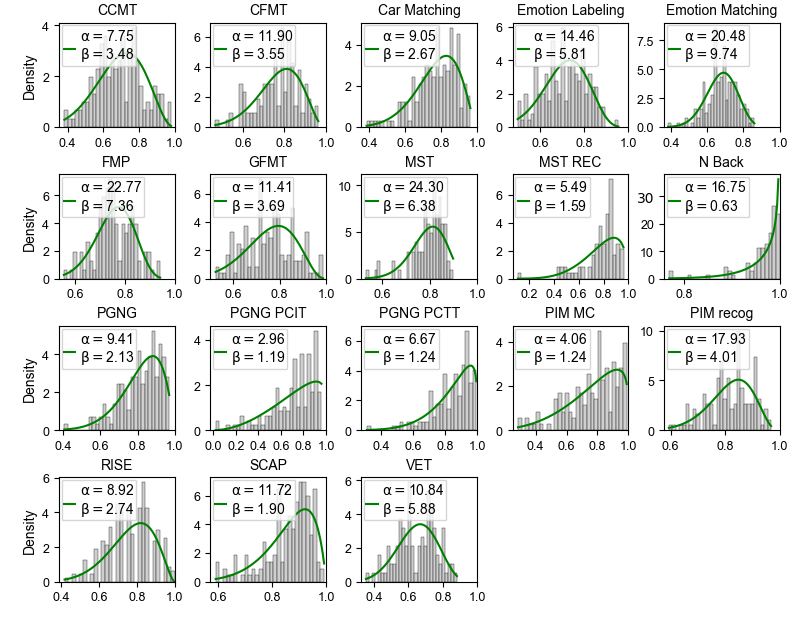

In [10]:
#######################
# define canvas

from cand import Canvas, Vector, Point
import matplotlib.ticker as ticker

# reset params just in case
plt.rcdefaults()

font_size=14
legend_size=9

# define vars
df_beta_fits = pd.DataFrame(columns=["task", "alpha", "beta", "mean", "corr_var"])
take_corr_cols_beta = sorted(list(set(take_corr_cols)-set(['userID', 'MST LDI', 'SCAP Cowan k', "N Back d'"])))

# CanD
a = 20
b = 16
c = Canvas(a, b, "cm")

# set font
# c.set_font("Helvetica", size=10)
c.set_font("Arial", size=10, ticksize=legend_size)

# letters
# c.add_text("a", Point(.02, 0.99), weight="bold", size=font_size)
# c.add_text("b", Point(.02, 0.37), weight="bold", size=font_size)
           
# titles
titles = ["Beta fits to our measures"]
# c.add_text(titles[0], Point(.5, 0.98), size=font_size)
# c.add_text(titles[1], Point(.82, 0.967), size=font_size)
# c.add_text(titles[2], Point(.47, 0.5), size=font_size)
for title in titles:
    print(title)

# ### GRID
# # top row, panel A
top_offset = .6
bottom_offset = 1.2
right_offset = 1.5
hsb = 1.2 #half_space_between - horizontal
vsb = 0.9 #half_space_between - vertical

# add a 4x5 grid
c.add_grid([f"p{i}" for i in range(len(take_corr_cols_beta))], 4, Point(right_offset, bottom_offset, "cm"), Point(a-0.2, b-top_offset, "cm"), spacing=Vector(vsb, hsb, "cm"), unitname="grid")


######### panel A
for i,col in enumerate(take_corr_cols_beta):        
    data = df_normed_wide[col].dropna()
        
    alpha, beta, mean, corr_var = beta_fit_using_moments(data)
    df_beta_fits = df_beta_fits.append(pd.DataFrame({
        "task": [col],
        "fit": ['moments'],
        "alpha": [alpha],
        "beta": [beta],
        "mean": [mean],
        "corr_var": [corr_var],
    }))

    # plotting
    ax = c.ax(f"p{i}")
    sns.histplot(data, bins=30, ax=ax, stat="density", color='silver')
    ax.set_title(col)
    ax.set_xlabel('')
    
#     # make sure it ends at 1
    ax.set_xlim(right=1)
#     ax.set_xlim(left=0)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
    
    if i%5 != 0:
        ax.set_ylabel('')
    
    # plot fit
    x=np.linspace(min(data),max(data),len(data))
    try:
        pdf_beta(x, alpha, beta)
    except FloatingPointError:
        x=np.linspace(min(data),max(data),len(data), endpoint=False)

    ax.plot(x, pdf_beta(x,alpha,beta), 'g', label=r'$\alpha=$'+f'{alpha:.2f}\n'+r'$\beta=$'+f'{beta:.2f}')

    ax.legend(loc='upper left', prop={'size': 4}, fontsize=2)

    
# c.debug_grid(Vector(0.5,0.5,"cm"))
c.show()
#
c.save(os.path.join(path_figures, "SI", 'SI_Figure_1.png'), dpi=300)#, bbox_inches="tight")
c.save(os.path.join(path_figures, "SI", 'SI_Figure_1.pdf'), dpi=300)#, bbox_inches="tight")

---

## Figure 2
[top](#top)

a/b ratios

Previously SI Fig. 7

In [11]:
def process_csv_files(folders, path):
    # create a big df
    df = pd.DataFrame()

    for folder in folders:
        csv_files = [x for x in os.listdir(os.path.join(path, folder)) if x.endswith('.csv')]
        for file in csv_files:
            tmp = pd.read_csv(os.path.join(path, folder, file))
            # add num sim
            tmp["n_sim"] = int(file.split('sim')[0].split('_')[-1])
            df = df.append(tmp)

    # add difference
    df["fit_theoretical_unbiased_dist"] = df["fit_theoretical_unbiased"] - df["true_C"]

    # check N
    assert len(folders) == len(df['N'].unique())
    assert set(df['N'].unique()) == set([int(x.split('N')[-1]) for x in folders])
    print(f'There is {len(df["N"].unique())} Ns.')

    df["a2b_ratio"] = df["mu_or_alpha"]/df["sigma_or_beta"]
    df["expected_C"] =  df["expected_C"].round().astype(int)
    df["fit_theoretical_unbiased_dist_perc"] = 100*df["fit_theoretical_unbiased_dist"]/df["true_C"]
    df["std"] = df["var_lognorm_or_beta"].apply(np.sqrt)

    return df


def plot_ratios(df, axs=None, x='a2b_ratio', y='fit_theoretical_unbiased_dist_perc', format_xlabels=True, showfliers=False, **kwargs):

    if axs is None:
        fig, axs = plt.subplots(len(df["expected_C"].unique()), 1, figsize=(10,18), sharey=True)
        
    plt.subplots_adjust(hspace=0.4)

    for i,C in enumerate(sorted(df["expected_C"].unique())):
        # deal with case where there is only one C
        if len(df["expected_C"].unique())==1:
            axi = axs
        else:
            axi = axs[i]

        data = df.loc[df["expected_C"]==C]

        g = sns.boxplot(data=data, x=x, y=y, showfliers=showfliers, ax=axi, **kwargs)
        axi.set_title(f'C={C}, N={data["N"].unique()[0]}, beta, n_sim={data["n_sim"].unique()[0]}')

        if format_xlabels:
            xlabels = [f'{float(x.get_text()):.2f}' for x in g.get_xticklabels()]
            g.set_xticklabels(xlabels)
        
        axi.axhline(0, c='k')


In [12]:

# get all names
folders = [x for x in os.listdir(path_ratios_noexplosions) if os.path.isdir(os.path.join(path_ratios_noexplosions,x)) and x=='50']


df_ratios_N50_noexplosions = process_csv_files(folders, path_ratios_noexplosions)

# clean the explosions
df_ratios_N50_noexplosions = df_ratios_N50_noexplosions[df_ratios_N50_noexplosions["exploded"]==0].copy()

# plot_ratios(df_ratios_N50_noexplosions)

# plt.suptitle('Without explosions', y=0.91)
# plt.show()

There is 1 Ns.


{'name': 'Arial'}
a2b ratios


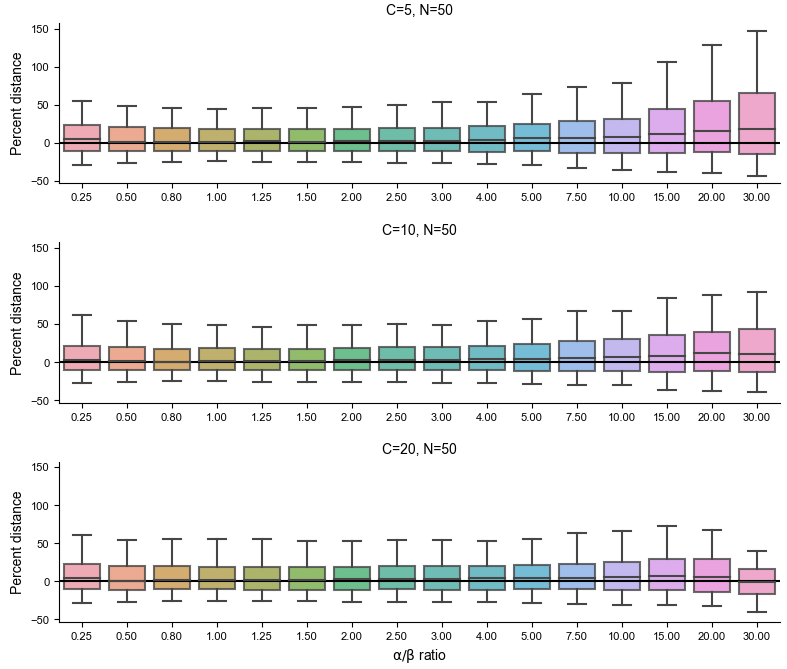

<Figure size 432x288 with 0 Axes>

In [13]:
#######################
# define canvas

from cand import Canvas, Vector, Point
import matplotlib.ticker as ticker

# reset params just in case
plt.rcdefaults()

font_size=14
legend_size=8#10

# define vars
df_beta_fits = pd.DataFrame(columns=["task", "alpha", "beta", "mean", "corr_var"])
take_corr_cols_beta = list(set(take_corr_cols)-set(['userID', 'MST LDI', 'SCAP Cowan k', "N Back d'"]))
Cs_a2b = [5, 10, 20]

# CanD
a = 20
b = 17
# b=24
# rot = 15
c = Canvas(a, b, "cm")

# set font
# c.set_font("Helvetica", size=10)
c.set_font("Arial", size=10, ticksize=legend_size)

# letters
# c.add_text("a", Point(.02, 0.99), weight="bold", size=font_size)
# c.add_text("b", Point(.02, 0.37), weight="bold", size=font_size)
           
# titles
titles = ["a2b ratios"]
# c.add_text(titles[0], Point(.5, 0.98), size=font_size)
# c.add_text(titles[1], Point(.82, 0.967), size=font_size)
# c.add_text(titles[2], Point(.47, 0.5), size=font_size)
for title in titles:
    print(title)

# ### GRID
# # top row, panel A
top_offset = .6
bottom_offset = 1.2
right_offset = 1.5
hsb = 1.5 #half_space_between - horizontal
vsb = 0.7 #half_space_between - vertical

# add a 3x2 grid
c.add_grid([f"a2b{i}" for i in range(len(Cs_a2b))], len(Cs_a2b), Point(right_offset, bottom_offset, "cm"), Point(a-0.2, b-top_offset, "cm"), spacing=Vector(vsb, hsb, "cm"), unitname="grid")



######### panel A

plot_ratios(df_ratios_N50_noexplosions.loc[df_ratios_N50_noexplosions["expected_C"].isin(Cs_a2b)], axs=[c.ax(f"a2b{i}") for i in range(len(Cs_a2b))], 
            showfliers=False, whis=[5,95], boxprops=dict(alpha=.8))

for i,ax in enumerate([c.ax(f"a2b{i}") for i in range(len(Cs_a2b))]):
    ax.set_title(f'C={Cs_a2b[i]}, N={df_ratios_N50_noexplosions["N"].unique()[0]}')
    ax.set_ylabel('Percent distance')
    ax.set_xlabel('')
    sns.despine(ax=ax)
    
    if i>0:
        # sharey, take the first axis and sharey with the last plotted one
        c.ax(f"a2b{i}").sharey(c.ax("a2b0"))
        # need to rescale all axis        
        c.ax(f"a2b{i}").autoscale()
    
c.ax(list(c.axes.keys())[-1]).set_xlabel(r'$\alpha/\beta$ ratio')

    
# c.debug_grid(Vector(0.5,0.5,"cm"))
c.show()
#
c.save(os.path.join(path_figures, "SI", 'SI_Figure_2.png'), dpi=300)#, bbox_inches="tight")
c.save(os.path.join(path_figures, "SI", 'SI_Figure_2.pdf'), dpi=300)#, bbox_inches="tight")

---
## Figure 3
[top](#top)

Dependence on C

Previously SI Fig. 9

{'name': 'Arial'}
Dependence of error in C estimation on value of C, N=10


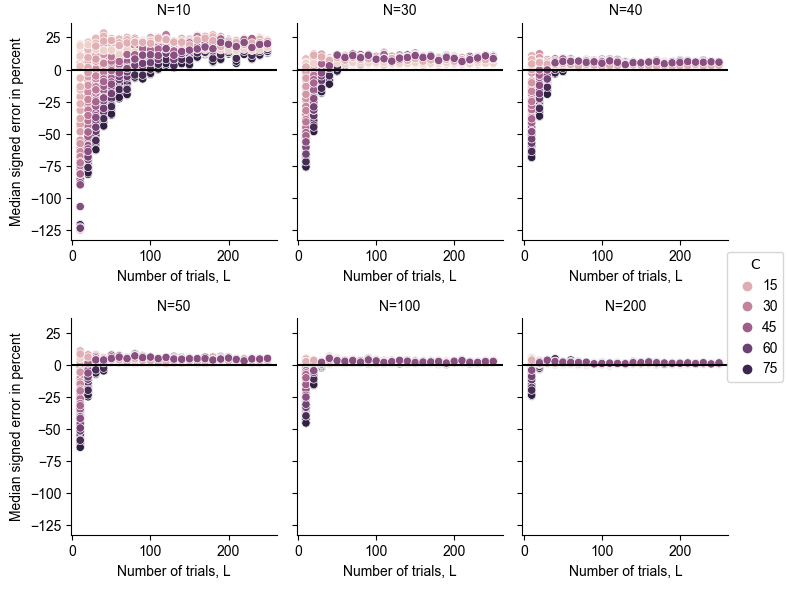

In [14]:
# load the data from corrected simulations
df_median_all = pd.read_csv(os.path.join(path_simulation_general, "simulate_unbiasedC_error", "multi", f"df_perc_median_noexplosions.csv"))

# select Ns that we want to use
sel_N = [10, 30, 40, 50, 100, 200]

#######################
# define canvas

from cand import Canvas, Vector, Point

# reset params just in case
plt.rcdefaults()

font_size=14
legend_size=10


# CanD
a = 20
b = 15
c = Canvas(a, b, "cm")

# set font
# c.set_font("Helvetica", size=10)
c.set_font("Arial", size=10)

# letters
# c.add_text("A", Point(.05, 0.98), weight="bold")
# c.add_text("a", Point(.02, 0.97), weight="bold", size=font_size)

           
# titles
titles = [f'Dependence of error in C estimation on value of C, N={df_median_all["N"].unique()[0]}']
# c.add_text(titles[0], Point(.27, 0.947), size=font_size)
# c.add_text(titles[1], Point(.82, 0.967), size=font_size)
# c.add_text(titles[2], Point(.47, 0.5), size=font_size)
for title in titles:
    print(title)

# ### GRID
offset = 1.8
top_offset=0.6
hsb = 2
wsb = 0.5

# bottom row
c.add_grid([f"N{N}" for N in sel_N], 2, Point(offset, 1.4, "cm"), Point(a-1.5, b-top_offset, "cm"), spacing=Vector(wsb, hsb, "cm"))


# middle row
    

######### panel A
# how many cols we have
m = 3 

for i,N in enumerate(sel_N):
    sns.scatterplot(data=df_median_all[df_median_all["N"]==N], 
                y="percent_error", x="total_n_trials", hue="true_C", legend='auto', ax=c.ax(f"N{N}"))
    
    c.ax(f"N{N}").axhline(0, c='k')
    c.ax(f"N{N}").set_title(f'N={N}')
    
    c.ax(f"N{N}").set_xlabel('Number of trials, L')
    
#     # legend
    if N==sel_N[-1]:
        c.ax(f"N{N}").legend(title='C', ncol=1, loc='upper right', columnspacing=0.4, handletextpad=.1, bbox_to_anchor=(1.3,1.34))
    else:
        c.ax(f"N{N}").legend().remove()
    
    if i%m==0:
        c.ax(f"N{N}").set_ylabel('Median signed error in percent')
        
        # share the other rows with the first
        if i != 0:
            # sharey, take the first axis and sharey with the last plotted one
            c.ax(f"N{N}").sharey(c.ax(f"N{sel_N[i//m]}"))
            # need to rescale all axis        
            c.ax(f"N{N}").autoscale()
    
    else:
        # share y with the first
        sharey_name(f"N{N}", f"N{sel_N[i//m]}")
    
    sns.despine(ax=c.ax(f"N{N}"))



## --------------------------------------------------    
    
# c.debug_grid(Vector(0.5,0.5,"cm"))
c.show()
#
c.save(os.path.join(path_figures, "SI", 'SI_Figure_3.png'), dpi=300)#, bbox_inches="tight")
c.save(os.path.join(path_figures, "SI", 'SI_Figure_3.pdf'), dpi=300)#, bbox_inches="tight")

---

## Figure 4
[top](#top)

Previously SI Fig. 1

In [15]:
files = [
 'CCMT_longitudinal_reliability_2_chunks_psychofit_step5-fit.csv',
 'CFMT_longitudinal_reliability_5_chunks_psychofit_step5-fit.csv',
 'FMP_longitudinal_reliability_2_chunks_psychofit_step5-fit.csv',
 'GFMT_longitudinal_reliability_4_chunks_psychofit_step2-fit.csv',
 'MST_LDI_longitudinal_reliability_2_chunks_psychofit_step4-fit.csv',
 'MST_REC_longitudinal_reliability_2_chunks_psychofit_step4-fit.csv',
 'MST_longitudinal_reliability_2_chunks_psychofit_step5-fit.csv',
 'PGNG_PCIT_longitudinal_reliability_2_chunks_psychofit_step1-fit.csv',
 'PGNG_PCTT_longitudinal_reliability_2_chunks_psychofit_step2-fit.csv',
 'PGNG_longitudinal_reliability_2_chunks_psychofit_step5-fit.csv',
 'PIM_MC_longitudinal_reliability_2_chunks_psychofit_step1-fit.csv',
 'PIM_recog_longitudinal_reliability_2_chunks_psychofit_step1-fit.csv',
 'RISE_longitudinal_reliability_1_chunks_psychofit_step1-fit.csv',
#  'RISE_concat_longitudinal_reliability_2_chunks_psychofit_step1-fit.csv',
 'SCAP_Cowan_k_longitudinal_reliability_2_chunks_psychofit_step2-fit.csv',
 'SCAP_longitudinal_reliability_2_chunks_psychofit_step5-fit.csv',
 'car_matching_longitudinal_reliability_2_chunks_psychofit_step2-fit.csv',
 'emotion_labelling_longitudinal_reliability_2_chunks_psychofit_step2-fit.csv',
 'emotion_matching_longitudinal_reliability_2_chunks_psychofit_step5-fit.csv',
 'nback_concat_level2_d_prime_longitudinal_reliability_2_chunks_psychofit_step3-fit.csv',
 'n_back_longitudinal_reliability_2_chunks_psychofit_step2-fit.csv',
 'VET_birds_planes_leaves_longitudinal_reliability_3_chunks_psychofit_step5-fit.csv',
]

print(len(files))

# define tasks
tasks = [x.split('_long')[0] for x in files]


21


{'name': 'Arial'}
Reliability curves: reliability vs number of trials per task, sampled 1000


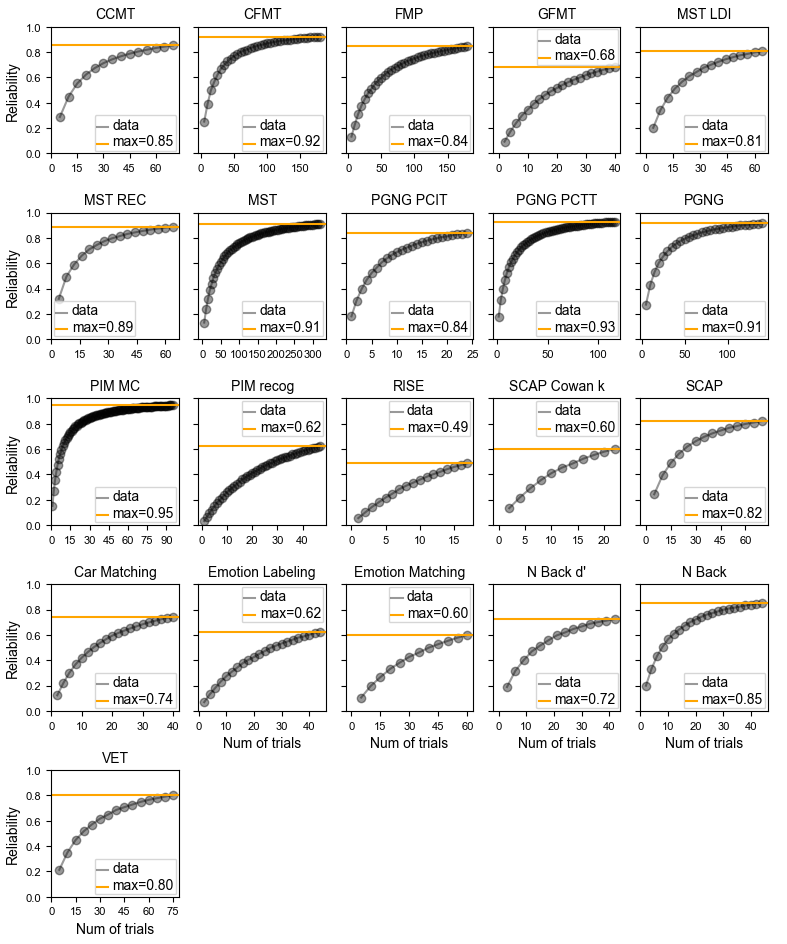

In [16]:
#######################
# define canvas

from cand import Canvas, Vector, Point
import matplotlib.ticker as ticker

# reset params just in case
plt.rcdefaults()

font_size=14
legend_size=8


# CanD
a = 20
b = 24
c = Canvas(a, b, "cm")

# set font
# c.set_font("Helvetica", size=10)
c.set_font("Arial", size=10, ticksize=legend_size)

# letters
# c.add_text("A", Point(.05, 0.98), weight="bold")
# c.add_text("A)", Point(.02, 0.98), weight="bold", size=font_size)
# c.add_text("B)", Point(.02, 0.5), weight="bold", size=font_size)
           
# titles
titles = ["Reliability curves: reliability vs number of trials per task, sampled 1000"]
# c.add_text(titles[0], Point(.5, 0.98), size=font_size)
# c.add_text(titles[1], Point(.82, 0.967), size=font_size)
# c.add_text(titles[2], Point(.47, 0.5), size=font_size)
for title in titles:
    print(title)

# ### GRID
# # top row, panel A
top_offset = .7
bottom_offset = 1.2
right_offset = 1.3
hsb = 1.5 #half_space_between - horizontal
vsb = .5 #half_space_between - vertical

# add a 3x2 grid
if len(files)>30:
    c.add_grid([f"p{i}" for i in range(len(files))], 8, Point(right_offset, bottom_offset, "cm"), Point(a-0.5, b-top_offset, "cm"), spacing=Vector(vsb, hsb, "cm"), unitname="grid")
else:
    c.add_grid([f"p{i}" for i in range(len(files))], 5, Point(right_offset, bottom_offset, "cm"), Point(a-0.5, b-top_offset, "cm"), spacing=Vector(vsb, hsb, "cm"), unitname="grid")




######### panel A
for (i,file), task, ax in zip(enumerate(files), tasks, c.axes.values()): 
    # this one is failing for some reason
    if task == 'FMP_slopes':
        continue
        
    df_tmp=None
#     print(f"\n\n----------------\n  Fitting task {task} from file {file} ...\n")
    df_tmp = pd.read_csv(os.path.join(path_curve_fit,file))

    x = df_tmp["n_trials"].values

    ax.plot(x, df_tmp["reliability"], c='k', label="data", alpha=0.4)
    ax.scatter(x, df_tmp["reliability"], c='k', alpha=0.4)
    # add max label
    ax.axhline(df_tmp["reliability"].max(), c="orange", label=f"max={df_tmp['reliability'].max():.2f}")  
    
    ax_title = task.replace("_", " ").replace("pseudoslopes", "").replace("concat", "").replace("labelling", "labeling").replace("faces-perc", "\ninterference - FM").replace("faces", "interference").replace("blank", "delay").replace("perception", "face matching").replace(" birds planes leaves", "").replace("n back", "N Back").replace("nback  level2 d prime", "N Back d'")
    if 'emotion' in ax_title or 'car' in ax_title:
        ax_title = ax_title.title() 
    ax.set_title(ax_title)
    
    # make sure it starts at 0
    ax.set_xlim(left=0)
    ax.set_ylim((0,1))
    
    # adjust xticks spacing
    if x.max()<=30:
        ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    elif x.max()<=50:
        ax.xaxis.set_ticks(np.arange(0, x.max()+1, 10))
        
    elif x.max()<=100:
        ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
    else:
        ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
        
    if task in ['RISE', 'emotion_matching', 'nback_concat_level2_d_prime', 'SCAP_Cowan_k', 'GFMT', 'MST_LDI', 'SCAP']:
        # add an invisible point to make the axis go from 0 as set_xlim does not make it
        ax.scatter(0, 0, c='w', alpha=0)
    
    # deal with labels
    if i>= len(files)-5:
        ax.set_xlabel("Num of trials")
    else:
        ax.set_xlabel("")
    
    if i%5==0:
        ax.set_ylabel("Reliability")
        source_ax = ax
    else:
        #ax.set_ylabel("")
        sharey_ax(ax, source_ax)
    
    # legend loc
    ax.legend(loc="best", fontsize=legend_size-4)

    
# c.debug_grid(Vector(0.5,0.5,"cm"))
c.show()
#
c.save(os.path.join(path_figures, "SI", 'SI_Figure_4.png'), dpi=300)#, bbox_inches="tight")
c.save(os.path.join(path_figures, "SI", 'SI_Figure_4.pdf'), dpi=300)#, bbox_inches="tight")

In [17]:
tasks

['CCMT',
 'CFMT',
 'FMP',
 'GFMT',
 'MST_LDI',
 'MST_REC',
 'MST',
 'PGNG_PCIT',
 'PGNG_PCTT',
 'PGNG',
 'PIM_MC',
 'PIM_recog',
 'RISE',
 'SCAP_Cowan_k',
 'SCAP',
 'car_matching',
 'emotion_labelling',
 'emotion_matching',
 'nback_concat_level2_d_prime',
 'n_back',
 'VET_birds_planes_leaves']

---

## Figure 5
[top](#top)

Correlation

Previously SI Fig. 2

In [18]:
df_wide = pd.read_csv(os.path.join(path_meaning, "correlation_between_all_measures.csv"))

# update names
df_wide.columns = [x.replace("_", " ") for x in df_wide.columns]

task_names = [
 'CCMT',
 'CFMT',
 'FMP',
 'GFMT',
 'MST',
 'PGNG',
 'PIM_MC',
 'PIM_recog',
 'RISE',
 'SCAP',
 'VET_birds',
 'VET_leaves',
 'VET_planes',
 'VET_birds_planes_leaves'
 'car_matching',
 'emotion_labelling',
 'emotion_matching',
 'nback',
]

In [19]:
df_wide.rename(columns={
    'emotion labelling': 'Emotion Labeling', 'emotion matching':'Emotion Matching', 'car matching':'Car Matching',
    "FMP faces":"FMP filled delay", "FMP blank":"FMP unfilled delay", "FMP perception":"FMP no delay",
    "FMP faces-perc":"FMP filled delay - no delay",
    'hobby': 'PIM hobby', 'vice': 'PIM vice', 'code name': 'PIM code name', 'country': 'PIM country',
    'nback': 'N Back', #'d prime': "N Back d'", 
    'beta':'nback beta', 'c':'nback c', 'd prime':'nback d prime', 
    'd prime l2': "N Back d'", 'beta':'nback beta l2', 'c':'nback c l2',
    'VET birds planes leaves':'VET',
}, inplace=True)

In [20]:
take_corr_cols

['userID',
 'CCMT',
 'CFMT',
 'FMP',
 'GFMT',
 'MST',
 'MST LDI',
 'MST REC',
 'PGNG',
 'PGNG PCTT',
 'PGNG PCIT',
 'PIM MC',
 'PIM recog',
 'RISE',
 'SCAP',
 'SCAP Cowan k',
 'VET',
 'Car Matching',
 'Emotion Labeling',
 'Emotion Matching',
 'N Back',
 "N Back d'"]

{'name': 'Arial'}
Correlation between accuracies in 17 tasks and 21 measures


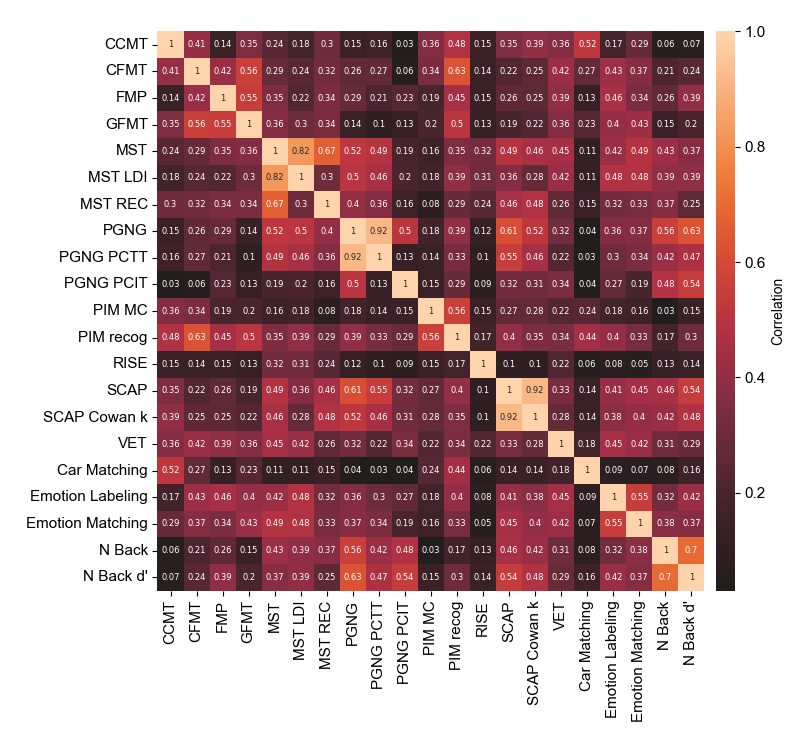

In [21]:
#######################
# define canvas

from cand import Canvas, Vector, Point
import matplotlib.ticker as ticker

# reset params just in case
plt.rcdefaults()

font_size=14
legend_size=11


# CanD
a = 20
b = 19
# rot = 15
c = Canvas(a, b, "cm")

# set font
# c.set_font("Helvetica", size=10)
c.set_font("Arial", size=10, ticksize=legend_size)

# letters
# c.add_text("A", Point(.05, 0.98), weight="bold")
# c.add_text("B)", Point(.02, 0.5), weight="bold", size=font_size)
           
# titles
titles = [f'Correlation between accuracies in {len(task_names)} tasks and {len(df_wide.loc[:,take_corr_cols].columns)-1} measures']
# c.add_text(titles[0], Point(.5, 0.98), size=font_size)
# c.add_text(titles[1], Point(.82, 0.967), size=font_size)
# c.add_text(titles[2], Point(.47, 0.5), size=font_size)
for title in titles:
    print(title)

# ### GRID
# # top row, panel A
top_offset = .8
bottom_offset = 4
left_offset = 4
hsb = 1 #half_space_between - horizontal
vsb = 1 #half_space_between - vertical

# add a 1x2 grid
c.add_grid(["corr"], 1, Point(left_offset, bottom_offset, "cm"), Point(a-0.9, b-top_offset, "cm"), spacing=Vector(vsb, hsb, "cm"), unitname="grid")


######### panel A
sns.heatmap(
    df_wide.loc[:,take_corr_cols].corr().round(2), # round it to two decimal places for clarity
    center=0, ax=c.ax("corr"),
    annot=True, annot_kws={"fontsize":6},
    cbar_kws={"aspect":30, "label":"Correlation", "fraction":0.06, "pad": 0.02}
           )

    
# c.debug_grid(Vector(0.5,0.5,"cm"))
c.show()
#
c.save(os.path.join(path_figures, "SI", 'SI_Figure_5.png'), dpi=300)#, bbox_inches="tight")
c.save(os.path.join(path_figures, "SI", 'SI_Figure_5.pdf'), dpi=300)#, bbox_inches="tight")

---
## Figure 6
[top](#top)

Shrinking, this figure is elsewhere, see:

`estimate_shrinking_error.ipynb`


Previously SI Fig. 3

---

## Figure 8
[top](#top)

Intercept

Previously SI Fig. 6

Processing 21 tasks.
Model(linear)
Model(hyperbolic_fit)
Model(linear)
Model(hyperbolic_fit)


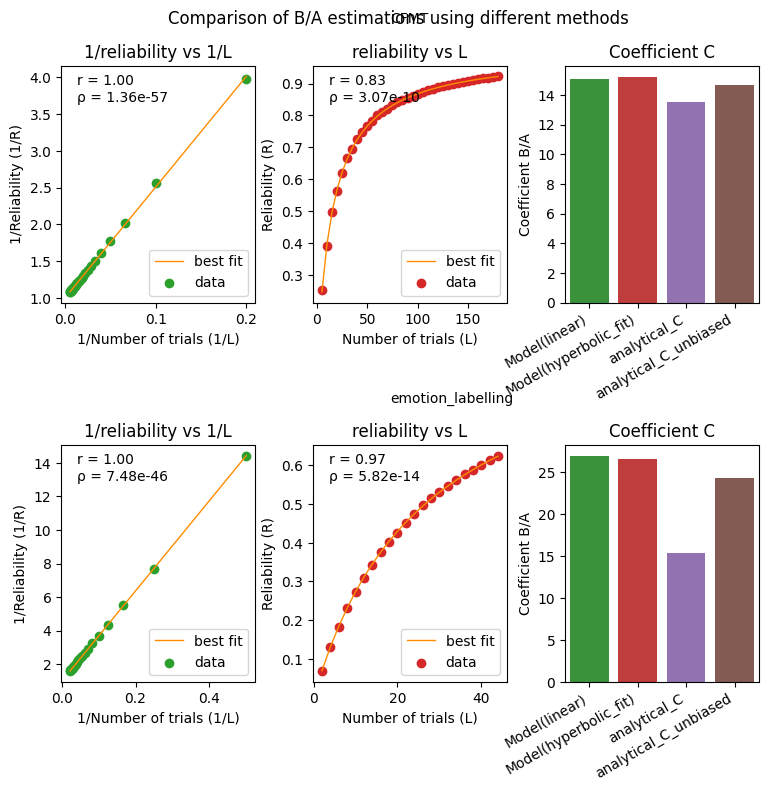

In [22]:
selected_files = [
 'CFMT_longitudinal_reliability_5_chunks_psychofit_step5-fit.csv',
 'emotion_labelling_longitudinal_reliability_2_chunks_psychofit_step2-fit.csv',
]

cmap = sns.color_palette()[2:]

df_results_tasks = pd.DataFrame()
# save some results
dic_selected_results = {}


# define tasks
tasks = [x.split('_long')[0] for x in files]

print(f"Processing {len(tasks)} tasks.")

# define plot
fig, axs = plt.subplots(len(selected_files), 3, figsize=(4*len(selected_files)+1, 4*len(selected_files)))
plt.subplots_adjust(hspace=0.6, wspace=0.3)

# define helper index 
t = 0
for file, task in zip(files, tasks):
        
    df_tmp=None
#     print(f"\n\n----------------\n  Fitting task {task} from file {file} ...\n")
    df_tmp = pd.read_csv(os.path.join(path_curve_fit,file))
    
    
    #### perform fit
    # go over all the functions
    for (i,fx) in enumerate([linear, hyperbolic_fit]):

        result = None
        gmodel = None
        
        # initiate the model
        gmodel = Model(fx, nan_policy='omit')
        
        # define variables 
        if gmodel.name == 'Model(hyperbolic_fit)':
            x = df_tmp["n_trials"].values
            y = df_tmp["reliability"].values
        else:
            x = 1/df_tmp["n_trials"].values
            y = 1/df_tmp["reliability"].values


        # set params, it differs for different functions
        if len(gmodel.param_names)==1:
            params = gmodel.make_params(a=3)
#             print(f"For model {gmodel.name} taking 1 param.")        

        elif len(gmodel.param_names)==2:
            if 'cdf_lognormal' in gmodel.name or 'cdf_normal' in gmodel.name:
                params = gmodel.make_params(mu=2, sigma=0.3)
            else:
                params = gmodel.make_params(a=3, b=1)
#             print(f"For model {gmodel.name} taking 2 params.")

        # perform the fit
        try:
            result = gmodel.fit(y, params, x=x)
            # check if we have b
            if 'b' in result.best_values.keys():
                b = result.best_values["b"]
            else:
                b = np.nan
            # save summary
            df_results_tasks = df_results_tasks.append(
                pd.DataFrame({
                    "task": [task],
                    "model_name": [result.model.name],
                    "bic": [result.bic],
                    "aic": [result.aic],
                    "chi_sq": [result.chisqr],
                    "a": [result.best_values["a"]],
                    "b": [b],
                    "n_trials": [df_tmp["n_trials"].max()],
                    })
            )
            
            
        except ValueError:
            result = None
            # save summary
            df_results_tasks = df_results_tasks.append(
                pd.DataFrame({
                    "task": [task],
                    "model_name": [gmodel.name],
                    "bic": [None],
                    "aic": [None],
                    "chi_sq": [None],
                    })
            )
            

        ### plot
        if file in selected_files:
            #     ax.plot(x, y, 'o', alpha=0.4)
            axs[t, i].plot(x, result.best_fit, '-', label='best fit', lw=1, c='darkorange')
            axs[t, i].scatter(x, y, color=cmap[i], label='data')

            label_correlation(x, y, axs[t, i])
            
            print(f"{gmodel.name}")
            if file not in dic_selected_results.keys():
                dic_selected_results[file]={}
            dic_selected_results[file][f"{gmodel.name}"]=result# = {f"{gmodel.name}":result}
            
        
    # add analytical value
    if "mean_p" in df_tmp.columns and "var_p" in df_tmp.columns:
        # add naive estimate
        df_results_tasks = df_results_tasks.append(
                pd.DataFrame({
                    "task": [task],
                    "model_name": ["analytical_C"],
                    "bic": [np.nan],
                    "aic": [np.nan],
                    "chi_sq": [np.nan],
                    "a": [analytical_C(df_tmp.iloc[-1]["mean_p"], df_tmp.iloc[-1]["var_p"])],
                    "b": [np.nan],
                    "n_trials": [df_tmp["n_trials"].max()],
                    })
            )

        # add MV fit
        df_results_tasks = df_results_tasks.append(
                pd.DataFrame({
                    "task": [task],
                    "model_name": ["analytical_C_unbiased"],
                    "bic": [np.nan],
                    "aic": [np.nan],
                    "chi_sq": [np.nan],
                    "a": [analytical_C_unbiased(df_tmp.iloc[-1]["mean_p"], df_tmp.iloc[-1]["var_p"], df_tmp["n_trials"].max())],
                    "b": [np.nan],
                    "n_trials": [df_tmp["n_trials"].max()],
                    })
            )


    if file in selected_files:
        if "mean_p" in df_tmp.columns and "var_p" in df_tmp.columns:
            # plot the a
            sns.barplot(data=df_results_tasks.iloc[-4:].loc[:,["model_name", "a"]], y='a', x='model_name', ax=axs[t, 2], palette=cmap)
        else:
            sns.barplot(data=df_results_tasks.iloc[-2:].loc[:,["model_name", "a"]], y='a', x='model_name', ax=axs[t, 2], palette=cmap)

        axs[t, 0].set_title('1/reliability vs 1/L')
        axs[t, 1].set_title('reliability vs L')
        axs[t, 2].set_title('Coefficient C')

        axs[t, 0].set_xlabel('1/Number of trials (1/L)')
        axs[t, 1].set_xlabel('Number of trials (L)')
        axs[t, 2].set_xlabel('')
        axs[t, 0].set_ylabel('1/Reliability (1/R)')
        axs[t, 1].set_ylabel('Reliability (R)')
        axs[t, 2].set_ylabel('Coefficient C')

        axs[t, 0].legend(loc="lower right")
        axs[t, 1].legend(loc="lower right")
        
        plt.setp(axs[t, 2].get_xticklabels(), rotation=30, ha='right')
        axs[t, 2].set_ylabel('Coefficient B/A')

        axs[t,1].text(0.4, 1.18, f'{task}', transform=axs[t,1].transAxes)

        # increase t
        t += 1
    

plt.suptitle("Comparison of B/A estimations using different methods", y=.95)
plt.show()

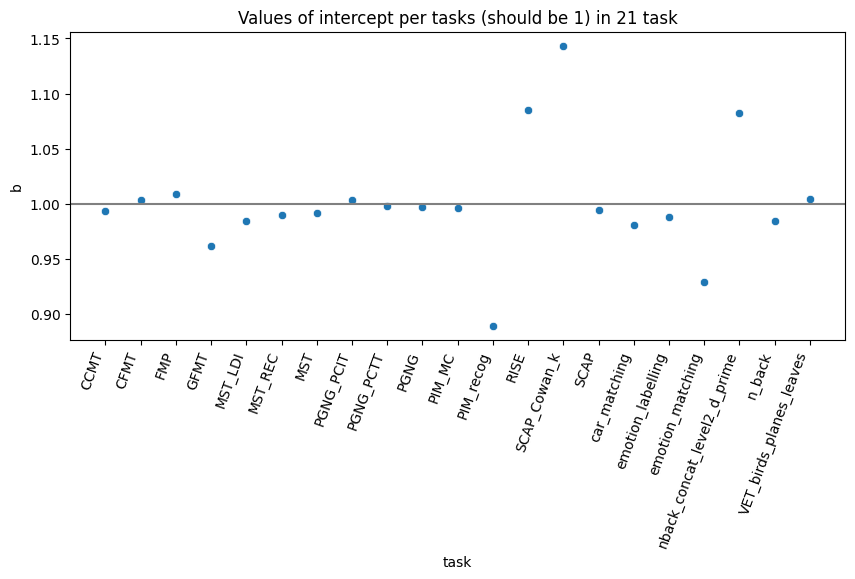

In [23]:
assert df_results_tasks["b"].dropna().unique().size == df_results_tasks["task"].dropna().unique().size

plt.figure(figsize=(10,4))
sns.scatterplot(data=df_results_tasks, x='task', y='b')
plt.axhline(1,c='gray')
plt.xticks(rotation=70, ha='right')
plt.title(f'Values of intercept per tasks (should be 1) in {df_results_tasks["b"].dropna().unique().size} task')
plt.show()

{'name': 'Arial'}
Values of intercept per tasks (should be 1) in 21 task


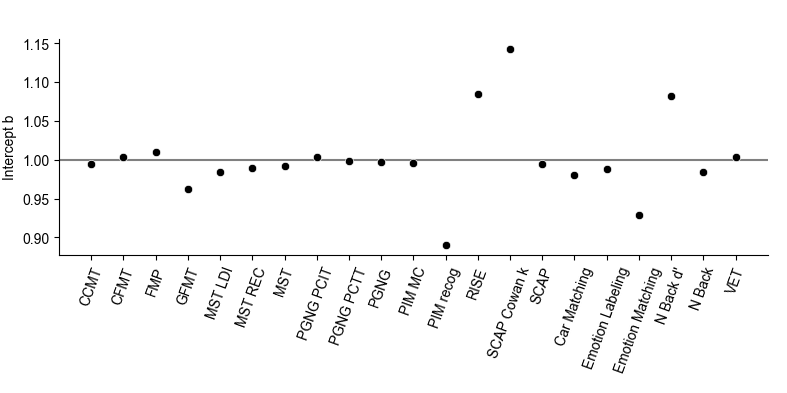

In [24]:
#######################
# define canvas

from cand import Canvas, Vector, Point
import matplotlib.ticker as ticker

# reset params just in case
plt.rcdefaults()

font_size=14
legend_size=10


# CanD
a = 20
b = 10
c = Canvas(a, b, "cm")

# set font
# c.set_font("Helvetica", size=10)
c.set_font("Arial", size=10, ticksize=legend_size)

# letters
# c.add_text("A", Point(.05, 0.98), weight="bold")
# c.add_text("B)", Point(.02, 0.32), weight="bold", size=font_size)

# titles
titles = [f'Values of intercept per tasks (should be 1) in {df_results_tasks["b"].dropna().unique().size} task']
# c.add_text(titles[0], Point(.5, 0.96), size=font_size)
# c.add_text(titles[1], Point(.5, 0.32), size=font_size)
# c.add_text(titles[2], Point(.47, 0.5), size=font_size)
for title in titles:
    print(title)

# ### GRID
# # top row, panel A
top_offset = 1.
bottom_offset = 3.5
right_offset = 1.5
hsb = 2 #half_space_between - horizontal
vsb = 1.5 #half_space_between - vertical

# add a 1x1 grid
c.add_grid(["intercept"], 1, Point(right_offset, bottom_offset, "cm"), Point(a-0.5, b-top_offset, "cm"), spacing=Vector(vsb, hsb, "cm"), unitname="grid")


######### panel A
assert df_results_tasks["b"].dropna().unique().size == df_results_tasks["task"].dropna().unique().size

sns.scatterplot(data=df_results_tasks, x='task', y='b', ax=c.ax("intercept"), color='k')
c.ax("intercept").axhline(1,c='gray', zorder=0)
c.ax("intercept").set_ylabel('Intercept b')
c.ax("intercept").set_xlabel('')
# rotate the ticks
c.ax("intercept").set_xticks(c.ax("intercept").get_xticks())
c.ax("intercept").set_xticklabels([x.get_text().replace("_", " ").replace(" concat", "").replace("labell", "Label").replace("pseudoslopes ", "").replace(" birds planes leaves", "").replace("emo", "Emo").replace("car", "Car").replace('match', 'Match').replace('n back', 'N Back').replace('nback level2 d prime', "N Back d'") for x in c.ax("intercept").get_xticklabels()], 
                                  rotation=70, ha='center')

# despine
sns.despine(ax=c.ax("intercept"))
    
# c.debug_grid(Vector(0.5,0.5,"cm"))
c.show()
#
c.save(os.path.join(path_figures, "SI", 'SI_Figure_8.png'), dpi=300)#, bbox_inches="tight")
c.save(os.path.join(path_figures, "SI", 'SI_Figure_8.pdf'), dpi=300)#, bbox_inches="tight")

## Figure 7
[top](#top)

examples of fitting, naive fitting method comparison

Previously SI Fig. 4

In [25]:
def plot_fit_comparison_data(df_results_tasks, axs, file, path_curve_fit, best_fit=None, xy=(.08, .85), order=None,
                             cmap=sns.color_palette()[2:], fit_names=["Model(linear)", "Model(hyperbolic_fit)"], 
                             label_corr=False, rot=40):

#     print(f"\n\n----------------\n  Fitting from file {file} ...\n")
    df_tmp = pd.read_csv(os.path.join(path_curve_fit, file))

    #### plot different fits
    for (i,fit_name) in enumerate(fit_names):

        # define variables 
        if fit_name == 'Model(hyperbolic_fit)':
            x = df_tmp["n_trials"].values
            y = df_tmp["reliability"].values
        elif fit_name == 'Model(linear)':
            x = 1/df_tmp["n_trials"].values
            y = 1/df_tmp["reliability"].values
        else:
            exit()

        ### plot
        if best_fit is not None:
            axs[i].plot(x, best_fit[fit_name].best_fit, '-', label='best fit', lw=1, c='darkorange') #- TODO
        axs[i].scatter(x, y, color=cmap[i], label='data')

        if label_corr:
            label_correlation(x, y, axs[i], xy)


    if "mean_p" in df_tmp.columns and "var_p" in df_tmp.columns:
        if order is None:
            order=fit_names+['analytical_C', 'analytical_C_unbiased']
        else:
            # capitalise all but title
            order = [x.capitalize() if x!="MV" else x for x in order]
    else:
        if order is None:
            order=fit_names

    # plot the a
    sns.barplot(data=df_results_tasks.loc[df_results_tasks["task"]==file.split('_longit')[0],["model_name", "a"]].iloc[-len(order):], y='a', x='model_name', ax=axs[2], palette=cmap, order=order)

    axs[1].set_title('1/R vs 1/L')
    axs[0].set_title('R vs L')
    axs[2].set_title('Coefficient C')

    axs[1].set_xlabel('1/Number of trials (1/L)')
    axs[0].set_xlabel('Number of trials (L)')
    axs[2].set_xlabel('')
    axs[1].set_ylabel('1/Reliability (1/R)')
    axs[0].set_ylabel('Reliability (R)')
    axs[2].set_ylabel('Coefficient C')

    axs[0].legend(loc="lower right", handlelength=1)
    axs[1].legend(loc="lower right", handlelength=1)
    
    for ax in axs:
        sns.despine(ax=ax)

    plt.setp(axs[2].get_xticklabels(), rotation=rot, ha='center')
    axs[2].set_ylabel('Coefficient C')



In [26]:
df = pd.read_csv(os.path.join(path_simulation_general, 'beta_simulate_N_ntrials250', 'all_simulations_varyN_ntrials_250_C_between_1-100.csv'))

df["total_n_trials"] = 250

df

,hyperbolic_fit,fit_linear_slope,fit_linear_intercept,fit_theoretical,fit_theoretical_unbiased,distribution,true_C,expected_C,mu_or_a,sigma_or_b,mu_lognorm_or_beta,var_lognorm_or_beta,N,exploded,fit_hyperbolic_dist,fit_linear_dist,fit_theoretical_dist,fit_theoretical_unbiased_dist,total_n_trials
0,70.763975,70.814648,1.011786,56.417667,73.238374,beta,74.944847,75.0,37.5,37.5,0.5,0.003289,50,0.0,-4.180872,-4.130199,-18.527180,-1.706473,250
1,140.749033,172.774374,0.399157,92.271086,147.182616,beta,74.944847,75.0,37.5,37.5,0.5,0.003289,50,0.0,65.804186,97.829527,17.326239,72.237769,250
2,125.675856,130.776159,0.877829,86.636812,133.399715,beta,74.944847,75.0,37.5,37.5,0.5,0.003289,50,0.0,50.731009,55.831312,11.691965,58.454868,250
3,54.917798,56.252959,0.988995,46.258837,57.041743,beta,74.944847,75.0,37.5,37.5,0.5,0.003289,50,0.0,-20.027049,-18.691888,-28.686010,-17.903104,250
4,73.025395,70.559233,1.089718,58.161580,76.192179,beta,74.944847,75.0,37.5,37.5,0.5,0.003289,50,0.0,-1.919452,-4.385614,-16.783267,1.247332,250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579995,75.057394,79.119217,0.926345,58.216015,76.285250,beta,66.950141,67.0,33.5,33.5,0.5,0.003676,140,0.0,8.107253,12.169076,-8.734126,9.335108,250
1579996,53.290167,54.373158,0.981048,44.341955,54.165907,beta,66.950141,67.0,33.5,33.5,0.5,0.003676,140,0.0,-13.659974,-12.576983,-22.608186,-12.784234,250
1579997,77.655028,74.972898,1.057265,59.596615,78.663609,beta,66.950141,67.0,33.5,33.5,0.5,0.003676,140,0.0,10.704887,8.022757,-7.353526,11.713468,250
1579998,57.866547,56.760204,1.025438,47.303948,58.632714,beta,66.950141,67.0,33.5,33.5,0.5,0.003676,140,0.0,-9.083594,-10.189937,-19.646193,-8.317427,250


In [27]:
# select one particular N to match the main text
my_N = 100

df_median_fit = df.loc[(df["N"]==my_N), ["hyperbolic_fit", "fit_linear_slope", "fit_theoretical_unbiased", "fit_theoretical", "true_C"]].groupby(['true_C']).median().reset_index()
df_std_fit = df.loc[(df["N"]==my_N), ["hyperbolic_fit", "fit_linear_slope", "fit_theoretical_unbiased", "fit_theoretical", "true_C"]].groupby(['true_C']).std().reset_index()


In [28]:
def plot_C_vs_trueC(df_median_fit, df_std_fit, ax,
                    fits_list=["hyperbolic_fit", "fit_linear_slope", "fit_theoretical_unbiased", "fit_theoretical"],
                    cmap_fits=['teal', 'lightskyblue', "mediumpurple", "darkred"], 
                    c_hline='gray', shaded_alpha = 0.2, ylim=None, xlim=None,
                    plot_every=2):


    for fit, colour in zip(fits_list, cmap_fits):

        x = df_median_fit.loc[:, "true_C"][::plot_every]

        ax.scatter(x, df_median_fit[fit][::plot_every], color=colour, label=f'{fit}')
        # plot error
        ax.fill_between(
            x,
            df_median_fit[fit][::plot_every]-df_std_fit[fit][::plot_every],
            df_median_fit[fit][::plot_every]+df_std_fit[fit][::plot_every],
            color=colour, alpha=shaded_alpha,
        )

    ax.plot(x, x, c=c_hline, label=r'$x=y$', linestyle="--")

    ax.set_xlabel('True C')
    ax.set_ylabel('Fitted C')

    if ylim is not None:
        ax.set_ylim(ylim)
    else:
        ax.set_ylim(bottom=0)
        
    if xlim is not None:
        ax.set_xlim(xlim)
    else:
        ax.set_xlim(left=0)


    sns.despine(ax=ax)
    ax.legend(loc="upper left")


{'name': 'Arial'}
Fitted versus true C for all methods, N=100, L=250, n sim=1000
Comparison of C estimations using different methods
CFMT_longitudinal_reliability_5_chunks_psychofit_step5-fit.csv
emotion_labelling_longitudinal_reliability_2_chunks_psychofit_step2-fit.csv


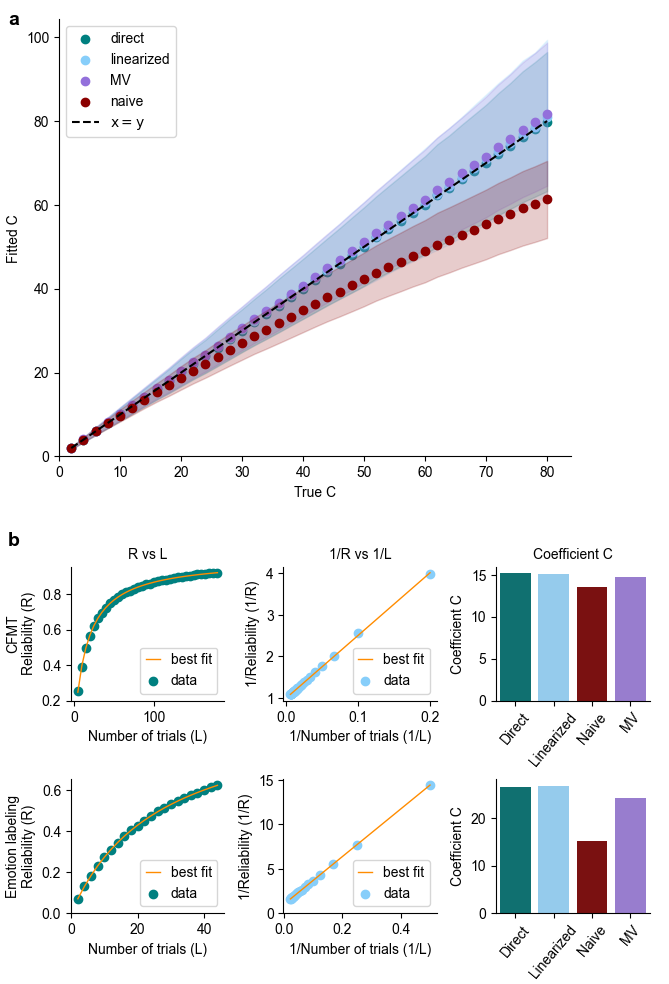

In [29]:
#######################
# define canvas

from cand import Canvas, Vector, Point
import matplotlib.ticker as ticker

# reset params just in case
plt.rcdefaults()

font_size=14
legend_size=10

# define step to make the sampling lesser
plot_every=2
# cmap_fits=['teal', 'lightskyblue', "mediumpurple", "darkred"]
fits_list_fig4 = ["direct", "linearized", "MV", "naive"]

# define colours for the different fits
dic_fit_colours = {
    'hyperbolic_fit': 'teal',
    'direct': 'teal',
    'fit_linear_slope': 'lightskyblue', 
    'linearized':  'lightskyblue',
    'fit_theoretical_unbiased': 'mediumpurple', 
    'MV': 'mediumpurple', 
    'fit_theoretical': 'darkred', 
    'naive': 'darkred', 
}

# for b
rename_fit_names = {'Model(linear)':'Linearized', 'Model(hyperbolic_fit)':'Direct', 'analytical_C':'Naive', 'analytical_C_unbiased':'MV'}
fit_order_list = ["direct", "linearized", "naive", "MV"]

# CanD
a = 17#20
b = 25
c = Canvas(a, b, "cm")

# set font
# c.set_font("Helvetica", size=10)
c.set_font("Arial", size=10, ticksize=legend_size)

# letters
# c.add_text("A", Point(.05, 0.98), weight="bold")
c.add_text("a", Point(.02, 0.98), weight="bold", size=font_size)
c.add_text("b", Point(.02, 0.45), weight="bold", size=font_size)
           
# titles
titles = [f'Fitted versus true C for all methods, N={my_N}, L={df["total_n_trials"].unique()[0]}, n sim=1000', "Comparison of C estimations using different methods"]
# c.add_text(titles[0], Point(.5, 0.96), size=font_size)
# c.add_text(titles[1], Point(.5, 0.32), size=font_size)
for title in titles:
    print(title)

# ### GRID
# # top row, panel A
top_offset = .5
bottom_offset = 1.8
left_offset = 1.5
left_offset_b = 1.8
right_offset = left_offset +1 #- 1
middle_line = 12.
hsb = 2 #half_space_between - horizontal
vsb = 1.5 #half_space_between - vertical
hsb2 = 1.4 # space between a and b panels

# add a 1x1 grid
c.add_grid(["C_vs_true_C"], 1, Point(left_offset, middle_line+hsb2, "cm"), Point(a-right_offset, b-top_offset, "cm"), spacing=Vector(vsb, hsb, "cm"), unitname="grid")
c.add_grid(["ht1", "lt1", "tt1", "ht2", "lt2", "tt2"], 2, Point(left_offset_b, bottom_offset, "cm"), Point(a-0.5, middle_line-hsb2, "cm"), spacing=Vector(vsb, hsb, "cm"))

######### panel A
plot_C_vs_trueC(df_median_fit.rename(columns={"fit_linear_slope":"linearized", "fit_theoretical_unbiased":"MV", "hyperbolic_fit":"direct", "fit_theoretical":"naive"}),
                df_std_fit.rename(columns={"fit_linear_slope":"linearized", "fit_theoretical_unbiased":"MV", "hyperbolic_fit":"direct", "fit_theoretical":"naive"}),
                c.ax("C_vs_true_C"),
                fits_list=fits_list_fig4, cmap_fits=[dic_fit_colours[c] for c in fits_list_fig4], plot_every=plot_every, c_hline='k'
               )

######### panel B

for file, ax in zip(selected_files, [[c.ax("ht1"), c.ax("lt1"), c.ax("tt1")], [c.ax("ht2"), c.ax("lt2"), c.ax("tt2")]]):
    print(file)
    plot_fit_comparison_data(df_results_tasks.replace(rename_fit_names), ax, file, path_curve_fit, dic_selected_results[file], xy=(.02, .88),
                             cmap=[dic_fit_colours[c] for c in fit_order_list],#sns.color_palette('colorblind'),#cmap=sns.color_palette()[2:], 
                             fit_names=["Model(hyperbolic_fit)", "Model(linear)"], order=fit_order_list, rot=50)

for ax in [c.ax("lt2"), c.ax("ht2"), c.ax("tt2")]:
    ax.set_title('')
    
c.ax("ht1").set_ylabel('CFMT\n'+c.ax("ht1").get_ylabel())
c.ax("ht2").set_ylabel('Emotion labeling\n'+c.ax("ht2").get_ylabel())

# set ylim
c.ax("ht1").set_ylim(bottom=0.2)
c.ax("ht2").set_ylim(bottom=0)
c.ax("lt2").set_ylim(bottom=0)
    
# c.debug_grid(Vector(0.5,0.5,"cm"))
c.show()
#
c.save(os.path.join(path_figures, "SI", 'SI_Figure_7.png'), dpi=300)#, bbox_inches="tight")
c.save(os.path.join(path_figures, "SI", 'SI_Figure_7.pdf'), dpi=300)#, bbox_inches="tight")

---
## Figure 9
[top](#top)

Dependence on n trials

Previously SI Fig. 8

In [30]:
# from kneed import KneeLocator

# # define selection
# C_selection = [4, 16, 30]

# # create matrices
# arr_median = np.zeros((len(C_selection), df_median_all["N"].unique().size, df_median_all["total_n_trials"].unique().size))
# arr_std = np.zeros((len(C_selection), df_median_all["N"].unique().size, df_median_all["total_n_trials"].unique().size))
# for j, special_C in enumerate(C_selection):
#     # recreate the error matrix
#     for i, N in enumerate(df_median_all["N"].unique()):    
#         arr_median[j,i] = df_median_all.loc[(df_median_all["N"]==N)&(df_median_all["expected_C"]==special_C)].groupby(["total_n_trials"]).median().percent_error.values
#         arr_std[j,i] = df_median_all.loc[(df_median_all["N"]==N)&(df_median_all["expected_C"]==special_C)].groupby(["total_n_trials"]).median().percent_error_std.values



# ns = df_median_all["total_n_trials"].unique()
# Ns = df_median_all["N"].unique()
# n_elbows = []
# N_elbows = []

# for j, special_C in enumerate(C_selection):
#     print(special_C)

#     fig, axs = plt.subplots(5,4, figsize=(10,12))
#     plt.subplots_adjust(hspace=0.6)

#     for i, ax in enumerate(axs.flatten()):#range(arr_std[0].shape[0]):
#         kn = KneeLocator(ns, arr_std[j,i,:], curve='convex', direction='decreasing')
#     #     print(kn.knee)
#         n_elbows.append(kn.knee)

#         ax.plot(ns, arr_std[j,i,:], 'bx-')
#         ax.vlines(kn.knee, ax.get_ylim()[0], ax.get_ylim()[1], linestyles='dashed', label=f'{kn.knee}')
#         ax.set_xlabel('n trials')
#         if i % 4 ==0:
#             ax.set_ylabel('std median error')

#         ax.legend()
#         ax.set_title(f'N={Ns[i]}')

#     plt.show()


#     # do it for N
#     fig, axs = plt.subplots(5,5, figsize=(10,12))
#     plt.subplots_adjust(hspace=0.6)

#     for i, ax in enumerate(axs.flatten()):#range(arr_std[0].shape[0]):
#         kn = KneeLocator(Ns, arr_std[j,:,i], curve='convex', direction='decreasing')
#     #     print(kn.knee)
#         N_elbows.append(kn.knee)

#         ax.plot(Ns, arr_std[j,:,i], 'rx-')
#         ax.vlines(kn.knee, ax.get_ylim()[0], ax.get_ylim()[1], linestyles='dashed', label=f'{kn.knee}')
#         ax.set_xlabel('N')
#         if i % 5 ==0:
#             ax.set_ylabel('std median error')

#         ax.legend()
#         ax.set_title(f'n trials={ns[i]}')

#     plt.show()

In [31]:
# fig, axs = plt.subplots(1,3, figsize=(9,3))

# axs[0].hist(n_elbows[:len(n_elbows)//3], label='n')
# axs[0].hist(N_elbows[:len(N_elbows)//3], label='N')

# axs[1].hist(n_elbows[len(n_elbows)//3:2*len(n_elbows)//3], label='n')
# axs[1].hist(N_elbows[len(N_elbows)//3:2*len(N_elbows)//3], label='N')

# axs[2].hist(n_elbows[2*len(n_elbows)//3:], label='n', alpha=0.6)
# axs[2].hist(N_elbows[2*len(N_elbows)//3:], label='N', alpha=0.6)

# for j, C in enumerate(C_selection):
#     axs[j].set_title(f'C={C_selection[j]}')

# plt.legend()
# plt.suptitle('Distribution of elbow points for different N and n', y=1.1)
# plt.show()

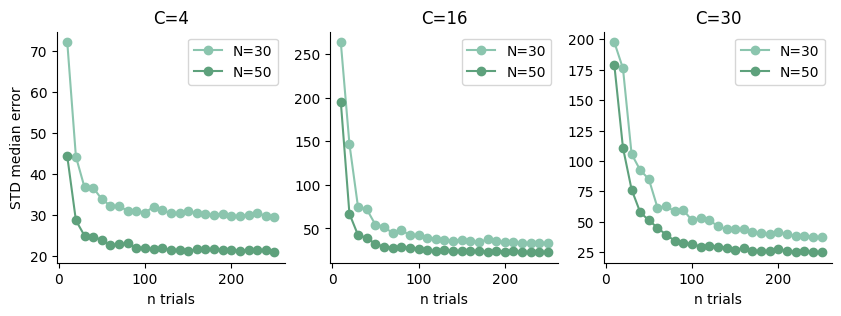

In [32]:
ns = df_median_all["total_n_trials"].unique()
Ns = df_median_all["N"].unique()

# C_selection = [4, 9, 16, 24, 30, 40]
C_selection = [4, 16, 30]
# select Ns that we want to use
sel_N = [30, 50]

colours_std_curves = sns.cubehelix_palette(start=1.8, n_colors=10, rot=0.2)

# create matrices
arr_median = np.zeros((len(C_selection), df_median_all["N"].unique().size, df_median_all["total_n_trials"].unique().size))
arr_std = np.zeros((len(C_selection), df_median_all["N"].unique().size, df_median_all["total_n_trials"].unique().size))
for j, special_C in enumerate(C_selection):
    # recreate the error matrix
    for i, N in enumerate(df_median_all["N"].unique()):    
        arr_median[j,i] = df_median_all.loc[(df_median_all["N"]==N)&(df_median_all["expected_C"]==special_C)].groupby(["total_n_trials"]).median().percent_error.values
        arr_std[j,i] = df_median_all.loc[(df_median_all["N"]==N)&(df_median_all["expected_C"]==special_C)].groupby(["total_n_trials"]).median().percent_error_std.values


# fig, axs = plt.subplots(2,3, figsize=(12,8))
fig, axs = plt.subplots(1,3, figsize=(10,3))
plt.subplots_adjust(hspace=0.3)

for N in sel_N:
    # get where N=50
    i = np.argwhere(Ns==N)[0][0]

    for (j, special_C), ax in zip(enumerate(C_selection), axs.flatten()):
    #     print(special_C)

        ax.plot(ns, arr_std[j,i,:], 'o-', color=colours_std_curves[i], label=f'N={N}')
        ax.set_xlabel('n trials')
        ax.legend()
        if j % 3 ==0:
            ax.set_ylabel('STD median error')

        ax.set_title(f'C={special_C}')
                
sns.despine()
# plt.suptitle(f'Elbow plots for N={Ns[i]}')

plt.show()

{'name': 'Arial'}
Dependence of error in C estimation on value of C and n trials for selected N


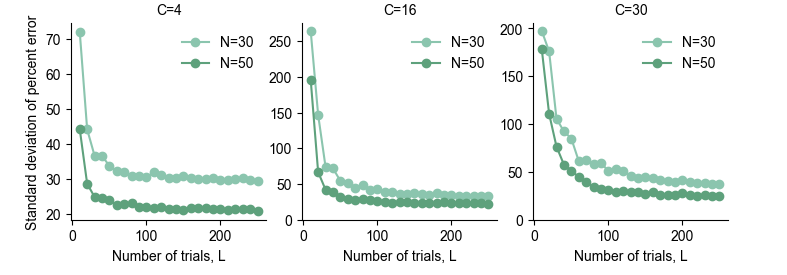

In [33]:
# select Ns that we want to use
sel_N = [30, 50]

#######################
# define canvas

from cand import Canvas, Vector, Point

# reset params just in case
plt.rcdefaults()

font_size=14
legend_size=10


# CanD
a = 20
b = 7
c = Canvas(a, b, "cm")

# set font
# c.set_font("Helvetica", size=10)
c.set_font("Arial", size=10)

# letters
# c.add_text("A", Point(.05, 0.98), weight="bold")
# c.add_text("a", Point(.02, 0.97), weight="bold", size=font_size)

           
# titles
titles = [f'Dependence of error in C estimation on value of C and n trials for selected N']
# c.add_text(titles[0], Point(.27, 0.947), size=font_size)
# c.add_text(titles[1], Point(.82, 0.967), size=font_size)
# c.add_text(titles[2], Point(.47, 0.5), size=font_size)
for title in titles:
    print(title)

# ### GRID
offset = 1.8
top_offset=0.6
hsb = 1
wsb = 0.9

# bottom row
c.add_grid([f"C{C}" for C in C_selection], 1, Point(offset, 1.4, "cm"), Point(a-1.5, b-top_offset, "cm"), spacing=Vector(wsb, hsb, "cm"))



######### panel A


for N in [30, 50]:
    # get where N=50
    i = np.argwhere(Ns==N)[0][0]

    for (j, special_C), ax in zip(enumerate(C_selection), axs.flatten()):

        c.ax(f"C{special_C}").plot(ns, arr_std[j,i,:], 'o-', color=colours_std_curves[i], label=f'N={N}')
        c.ax(f"C{special_C}").set_xlabel('Number of trials, L')
        c.ax(f"C{special_C}").legend(loc='upper right', bbox_to_anchor=(1,1), frameon=False)
        if j % 3 ==0:
            c.ax(f"C{special_C}").set_ylabel('Standard deviation of percent error')

        c.ax(f"C{special_C}").set_title(f'C={special_C}')
        
        sns.despine(ax=c.ax(f"C{special_C}"))
        
        if special_C>4:
            c.ax(f"C{special_C}").set_ylim(bottom=0)
        
        
# # how many cols we have
# m = 3 

# for i,N in enumerate(sel_N):
#     sns.scatterplot(data=df_median_all[df_median_all["N"]==N], 
#                 y="percent_error", x="total_n_trials", hue="true_C", legend='auto', ax=c.ax(f"N{N}"))
    
#     c.ax(f"N{N}").axhline(0, c='k')
#     c.ax(f"N{N}").set_title(f'N={N}')
    
#     c.ax(f"N{N}").set_xlabel('Number of trials, L')
    
# #     # legend
#     if N==sel_N[-1]:
#         c.ax(f"N{N}").legend(title='C', ncol=1, loc='upper right', columnspacing=0.4, handletextpad=.1, bbox_to_anchor=(1.3,1.34))
#     else:
#         c.ax(f"N{N}").legend().remove()
    
#     if i%m==0:
#         c.ax(f"N{N}").set_ylabel('Median signed error in percent')
        
#         # share the other rows with the first
#         if i != 0:
#             # sharey, take the first axis and sharey with the last plotted one
#             c.ax(f"N{N}").sharey(c.ax(f"N{sel_N[i//m]}"))
#             # need to rescale all axis        
#             c.ax(f"N{N}").autoscale()
    
#     else:
#         # share y with the first
#         sharey_name(f"N{N}", f"N{sel_N[i//m]}")
    




## --------------------------------------------------    
    
# c.debug_grid(Vector(0.5,0.5,"cm"))
c.show()
#
c.save(os.path.join(path_figures, "SI", 'SI_Figure_9.png'), dpi=300)#, bbox_inches="tight")
c.save(os.path.join(path_figures, "SI", 'SI_Figure_9.pdf'), dpi=300)#, bbox_inches="tight")

---
## Figures 10 and 11
[top](#top)

SI Figures 10 and 11 are in a separate notebook, in `Figure_4-Revisions-reliability_stability_across_days-FMP_CFMT_all_tasks.ipynb`.

---

In [34]:
# there is a bug in watermark which prevents it from seeing some "from ... import" imports, see 
# https://github.com/rasbt/watermark/issues/77, so I load it here separately
import lmfit

%load_ext watermark

%watermark -a 'Jan Kadlec' -nmvu -iv

Author: Jan Kadlec

Last updated: Sun Apr 14 2024

Python implementation: CPython
Python version       : 3.8.11
IPython version      : 7.26.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 23.4.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

lmfit     : 1.0.3
matplotlib: 3.6.2
pandas    : 1.2.4
seaborn   : 0.11.1
sys       : 3.8.11 (default, Aug  6 2021, 08:56:27) 
[Clang 10.0.0 ]
numpy     : 1.19.1



[top](#top)